In [43]:
# 1. CONFIGURACIÓN E IMPORTACIONES



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datetime import datetime

# Configuración de gráficos
%matplotlib inline
plt.style.use('ggplot')

print("Librerías cargadas correctamente.")

Librerías cargadas correctamente.


In [ ]:


file_path = 'bmw.csv'  

try:
    df = pd.read_csv(file_path)
    print("Datos cargados exitosamente.")
    print("\nPrimeras 5 filas:")
    display(df.head())
    print("\nInformación de columnas:")
    df.info()
except FileNotFoundError:
    print(f"Error: El archivo '{file_path}' no se encontró en esta carpeta. Verifica el nombre.")

Datos cargados exitosamente.

Primeras 5 filas:


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0



Información de columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [31]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [32]:
# Eliminar duplicados
df = df.drop_duplicates()

In [33]:
año_actual = datetime.now().year
df['antiguedad'] = año_actual - df['year']

In [34]:
df['antiguedad'] = 2025 - df['year']

In [35]:
df['antiguedad'].describe()

count    10664.000000
mean         7.937172
std          2.350668
min          5.000000
25%          6.000000
50%          8.000000
75%          9.000000
max         29.000000
Name: antiguedad, dtype: float64

In [36]:
df = df.dropna(subset=['price', 'year', 'mileage'])

In [40]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return data[(data[column] >= Q1 - 1.5 * IQR) & (data[column] <= Q3 + 1.5 * IQR)]

In [41]:
for col in ['price', 'mileage', 'engineSize']:
    df = remove_outliers(df, col)

In [ ]:

YEAR_ACTUAL = 2025

# La columna se calcula como: Año Actual - Año de Fabricación
df['car_age'] = YEAR_ACTUAL - df['year']

print("Nueva columna 'car_age' creada.")
print("Antigüedad de los 5 primeros autos:")
display(df[['year', 'car_age', 'price']].head())

Nueva columna 'car_age' creada.
Antigüedad de los 5 primeros autos:


,year,car_age,price
0,2014,11,11200
1,2018,7,27000
2,2016,9,16000
3,2017,8,12750
4,2014,11,14500


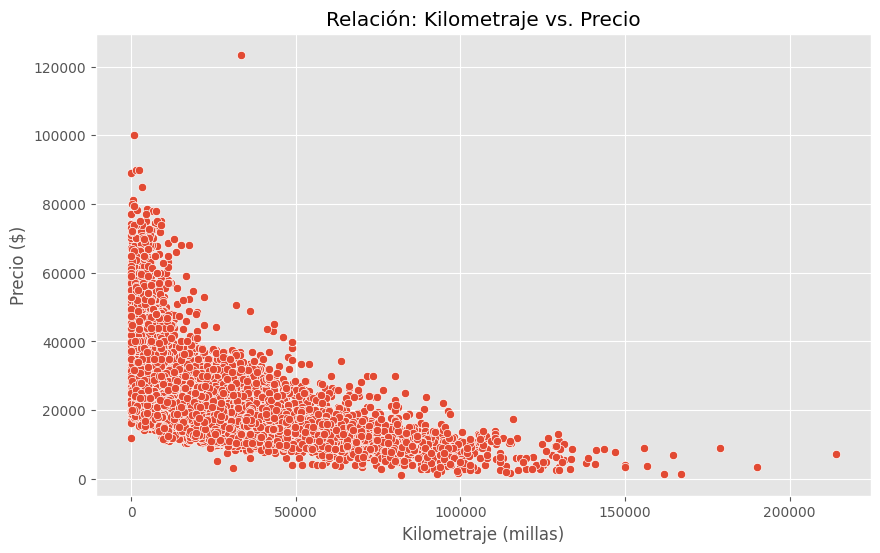

Correlación: -0.6054


In [ ]:


plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage', y='price', data=df)
plt.title('Relación: Kilometraje vs. Precio')
plt.xlabel('Kilometraje (millas)')
plt.ylabel('Precio ($)')
plt.show()

# Calcular correlación exacta
correlacion = df['mileage'].corr(df['price'])
print(f"Correlación: {correlacion:.4f}")

In [ ]:

columnas_numericas = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
df_corr = df[columnas_numericas]

# Calcular la matriz de correlación
matriz_correlacion = df_corr.corr()

print("Matriz de Correlación:")
display(matriz_correlacion)

Matriz de Correlación:


,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.623756,-0.774382,0.025200,-0.071762,-0.026337
price,0.623756,1.000000,-0.605397,0.263484,-0.204882,0.460196
mileage,-0.774382,-0.605397,1.000000,-0.170747,0.118609,-0.002540
tax,0.025200,0.263484,-0.170747,1.000000,-0.351798,0.429616
mpg,-0.071762,-0.204882,0.118609,-0.351798,1.000000,-0.399844
engineSize,-0.026337,0.460196,-0.002540,0.429616,-0.399844,1.000000


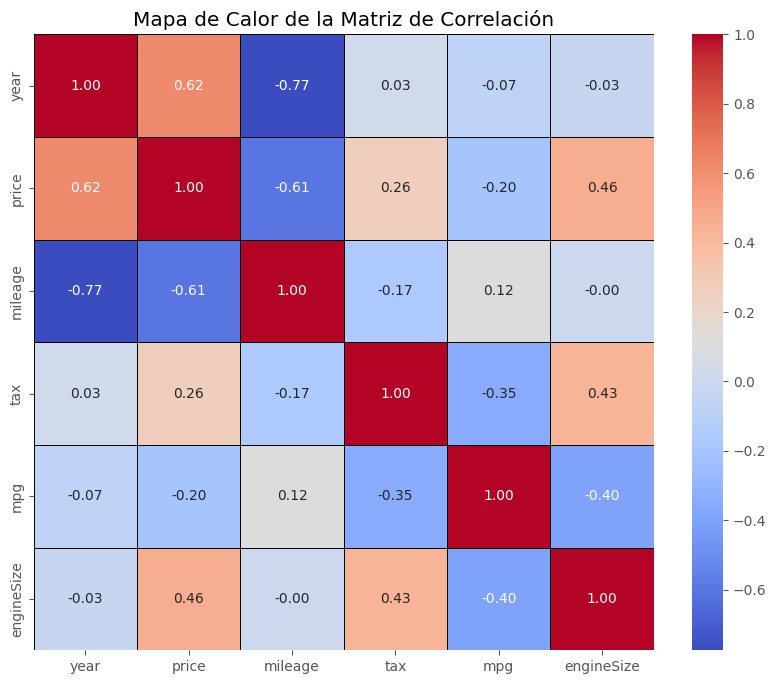

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', 
            linewidths=.5, linecolor='black')
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

In [44]:
features = ['year', 'mileage', 'engineSize', 'mpg', 'tax']
X = df[features]
y = df['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"Entrenamiento: {X_train.shape[0]} filas")
print(f"Prueba: {X_test.shape[0]} filas")

Entrenamiento: 5065 filas
Prueba: 1267 filas


In [ ]:

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("\n===== RESULTADOS DEL MODELO MEJORADO =====")
print("Intercepto:", model.intercept_)
print("Coeficientes por variable:")
for var, coef in zip(features, model.coef_):
    print(f"  {var}: {coef:.4f}")

print("\nEVALUACIÓN:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))


===== RESULTADOS DEL MODELO MEJORADO =====
Intercepto: 20938.537654235864
Coeficientes por variable:
  year: 4168.7790
  mileage: -2210.6182
  engineSize: 0.0000
  mpg: -350.9871
  tax: 886.0052

EVALUACIÓN:
MAE: 3030.6442953501582
MSE: 16175686.106642367
RMSE: 4021.9008076582854
R²: 0.7259936118346765


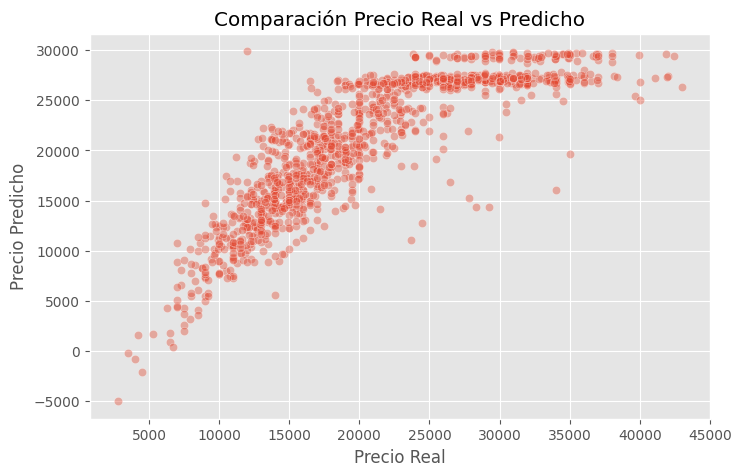

In [47]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Comparación Precio Real vs Predicho")
plt.show()
